In [ ]:
#Read in the data and clean it up
library(leaflet)
library(stringr)
options(repr.matrix.max.cols=50, repr.matrix.max.rows=100)

at <- read.table("AtlanticHurrData.txt", fill = TRUE)
pa <- read.table("pacificHurrData.txt", fill = TRUE, stringsAsFactors=FALSE)



names(at)[2] = "Names"
names(pa)[2] = "Names"
names(at)[3] = "Entries"
names(pa)[3] = "Entries"
names(at)[4] = "Date"
names(pa)[4] = "Date"
names(at)[5] = "Time"
names(pa)[5] = "Time"
names(at)[6] = "Record"
names(pa)[6] = "Record"
names(at)[7] = "Status"
names(pa)[7] = "Status"
names(at)[8] = "Lat"
names(pa)[8] = "Lat"
names(at)[9] = "Lon"
names(pa)[9] = "Lon"
names(at)[10] = "MaxWind"
names(pa)[10] = "MaxWind"
names(at)[11] = "MinPres"
names(pa)[11] = "MinPres"

at$Date <- as.POSIXct(x=at$Date, format = "%Y%m%d")
at$Time <- as.POSIXct(x=at$Time, format = "%H%M")
at$Record <- as.character(at$Record)





at$Lat <- stringr::str_replace(at$Lat,"N", "")
at$Lat <- stringr::str_replace(at$Lat,"S", "")
at$Lon <- stringr::str_replace(at$Lon,"W", "")
at$Lon <- stringr::str_replace(at$Lon,"E", "")

at


Warning message:
"package 'leaflet' was built under R version 3.6.2"Warning message:
"package 'stringr' was built under R version 3.6.2"

,Var1,Freq
384,"AL031899,",133
1626,"AL141971,",118
1819,"AL201969,",99
1656,"AL142012,",96
577,"AL041926,",95
607,"AL041957,",95
1302,"AL092004,",94
773,"AL051964,",92
1541,"AL122002,",90
1610,"AL132018,",89


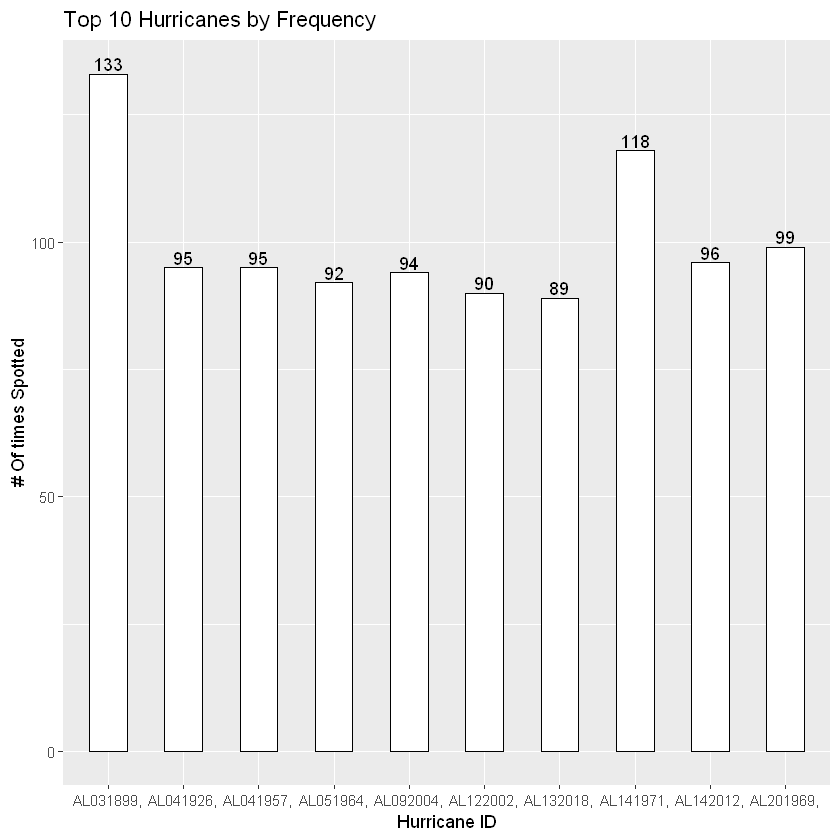

In [14]:
library(plyr)
library(ggplot2)


w = table(at$V1)

t = as.data.frame(w)

newdata <- head(t[order(-t$Freq),], n=10)
newdata

m <- ggplot(data= newdata, aes(x=Var1, y=Freq)) + 
    geom_bar(stat="identity", width=.5, color="black", fill="white") + 
    ggtitle("Top 10 Hurricanes by Frequency") +
    labs(x = "Hurricane ID", y = "# Of times Spotted") +
    geom_text(aes(label = Freq), position=position_dodge(width=.9), vjust=-.25)
m
